[[-8.33333838e-02 -2.49983665e-01  4.16651544e-01]
 [ 3.33333364e-01 -1.00776446e-05 -1.66657337e-01]
 [-8.33329791e-02  7.49885223e-01 -5.83227072e-01]]
[[-0.08333333 -0.25        0.41666667]
 [ 0.33333333  0.         -0.16666667]
 [-0.08333333  0.75       -0.58333333]]
A-1*A = 
 [[ 9.99990786e-01  2.22226629e-06  1.87080259e-05]
 [ 5.68458500e-06  9.99998629e-01 -1.15419978e-05]
 [ 6.47434044e-05 -1.56151403e-05  9.99868545e-01]]


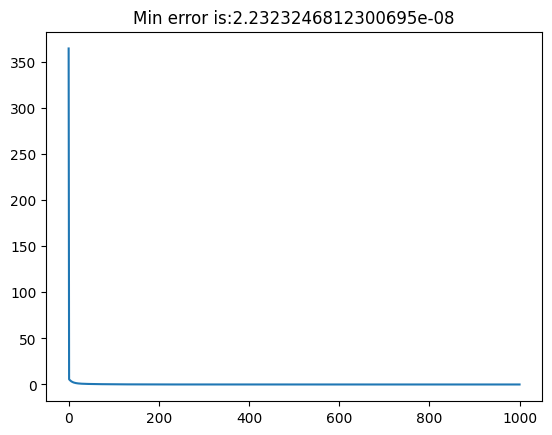

In [36]:
import numpy as np
import matplotlib.pyplot as plt

"""
We look to minimize the equation : Loss = ||BA - I||2_2
The notation above indicates that all the elements of the matrix BA are squared and summed.
i.e. ||X||2_2 = sum(Xij^2)

Here the gradient of the loss function is given by : dL/dB = 2(BA - I)A^T
We are looking to optimize the B matrix using an iterative method, defined by the following equation :
B(k) = B(k-1) - alpha * dL/dB, where alpha is the learning rate.
"""

def matrix_inversion(A: np.array, alpha: float, iterations: int):
   if A.shape[0] != A.shape[1]:
      raise ValueError("Matrix is not square")
   seed_value = 3221
   np.random.seed(seed_value)
   loss=[]
   B_last = np.random.rand(A.shape[0], A.shape[1])
   B = np.zeros(B_last.shape)
   I = np.identity(A.shape[0])
   for i in range(iterations):
      B = B_last - alpha * 2 * (B.dot(A) - I).dot(A.T)
      loss.append(np.sum((B@A - I)**2))
      B_last = B
      
   print(B)
   print(np.linalg.inv(A))
   print("A-1*A = \n", B_last.dot(A))
   # Linespace 0 to iterations
   x = np.linspace(0, iterations, iterations)
   # Plot the loss function and keep the plot open after function returns
   plt.figure()
   plt.title(f'Min error is:{min(loss)}')
   plt.plot(x, loss)
   plt.show()
   return B
   
   
if __name__ == "__main__":
   # Q1
   A = np.array([[3, 4, 1], 
              [5, 2, 3],
              [6, 2, 2]])
   
   # A = np.array([[3, 4, 1, 2, 1, 5],
   #               [5, 2, 3, 2, 2, 1],
   #               [6, 2, 2, 6, 4, 5],
   #               [1, 2, 1, 3, 1, 2],
   #               [1, 5, 2, 3, 3, 3],
   #               [1, 2, 2, 4, 2, 1]], dtype=np.float32)
   
   B1 = matrix_inversion(A, 0.005, 1000)
   # B2 = matrix_inversion(A, 0.001, 1000)
   # B3 = matrix_inversion(A, 0.01, 1000)  